# Capture

In [1]:
push!(LOAD_PATH,"../src/")
# Pkg.add("Plots")
# Pkg.clone("https://github.com/RedPointyJackson/Brooglie")
using AnharmCaptureRate
using Plots
using DataFrames
using PyPlot

In [2]:
# ENV["PYTHON"]=""
# Pkg.update()
# Pkg.build("PyCall")
# using PyPlot

In [3]:
# import data from two files
# Q (first column, amu) and E (second column, eV)
pot_1 = readtable("../src/Potential_1.csv")
pot_2 = readtable("../src/Potential_2.csv")
potential_matrix_1 = convert(Matrix, pot_1)
potential_matrix_2 = convert(Matrix, pot_2)
poly_order = 4;

In [4]:
potential_matrix_2

51×2 Array{Float64,2}:
 -20.0  20.3664 
 -19.0  18.4257 
 -18.0  16.631  
 -17.0  14.9712 
 -16.0  13.4363 
 -15.0  12.0173 
 -14.0  10.7064 
 -13.0   9.49579
 -12.0   8.37778
 -11.0   7.34617
 -10.0   6.39635
  -9.0   5.52476
  -8.0   4.72842
   ⋮            
  19.0   5.52476
  20.0   6.39635
  21.0   7.34617
  22.0   8.37778
  23.0   9.49579
  24.0  10.7064 
  25.0  12.0173 
  26.0  13.4363 
  27.0  14.9712 
  28.0  16.631  
  29.0  18.4257 
  30.0  20.3664 

In [5]:
cc = AnharmCaptureRate.calc_anharm_wave_func(potential_matrix_1, potential_matrix_2, poly_order, -20, 20, 500, 10);
# default values and inputs: calc_anharm_wave_func(potential_data_1::Array{Float64,2}, potential_data_2::Array{Float64,2}, 
    #poly_order =4, Qi=-10, Qf=10, NQ=100, nev=10)
# CaptureRate.plot_potentials(cc)
# ylims!(-2, 2)
# xlims!(-4, 3)

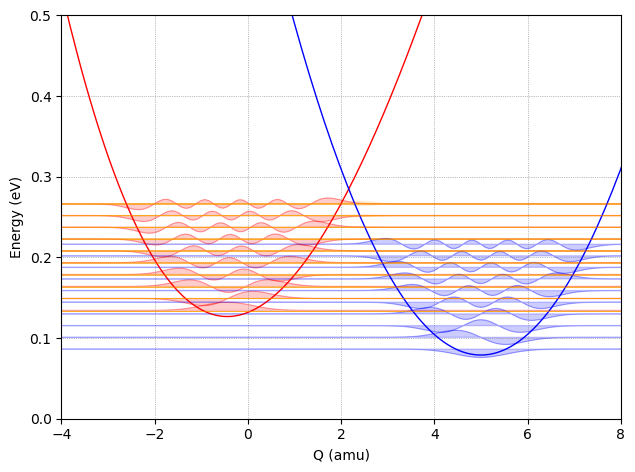

/Applications/JuliaPro-0.6.2.2.app/Contents/Resources/pkgs-0.6.2.2/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [6]:
AnharmCaptureRate.calc_overlap!(cc; cut_off=0.25, σ=0.01)
ax = gca()
ax[:set_ylim]([-0,0.5])
ax[:set_xlim]([-4, 8]);


# $\mathrm{GaN:C_N}$

In [7]:
# T_range = 1:10:800
# c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
# plot(T_range, c*4*6) # degeneracy * Sommerfeld factor
# yaxis!("C (cm^-3/s)",:log10)
# xaxis!("T (K)")
# ylims!(1E-11, 2E-8)

# $\mathrm{ZnO:Li_{Zn}}$

In [8]:
# cc = CaptureRate.calc_harm_wave_func(0.036, 0.025,
#         -3.22, -0.46; Qi=-10, Qf=5, NQ=1000, nev=60)
# CaptureRate.plot_potentials(cc)
# ylims!(-2, 2)
# xlims!(-10, 5)

In [9]:
# CaptureRate.calc_overlap!(cc; cut_off=0.5, σ=0.025)
# T_range = 1:10:800
# c = CaptureRate.calc_capt_coeff(3.9E-2, 1.136E-21, T_range, cc)
# plot(T_range, c*4*6) # degeneracy * Sommerfeld factor
# yaxis!("C (cm^-3/s)",:log10)
# xaxis!("T (K)")
# ylims!(1E-8, 1E-5)

# $\mathrm{GaN:C_N}$

In [10]:
# cc = CaptureRate.calc_harm_wave_func(0.026, 0.022,
#         -3.33, -0.88; Qi=-10, Qf=10, NQ=1000, nev=60)
# CaptureRate.plot_potentials(cc)
# ylims!(-2, 2)
# xlims!(-10, 5)

In [11]:
# CaptureRate.calc_overlap!(cc; cut_off=0.5, σ=0.025)
# T_range = 1:10:800
# c = CaptureRate.calc_capt_coeff(3.9E-2, 1.136E-21, T_range, cc)
# plot(T_range, c) # degeneracy * Sommerfeld factor
# yaxis!("C (cm^-3/s)",:log10)
# xaxis!("T (K)")
# ylims!(1E-10, 1E-6)